<a href="https://colab.research.google.com/github/anisa-fitria/Final_Project_Kelompok5/blob/main/Final_Project_Hyophorbe_Lagenicaulis_Banjir_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "ANALISIS DAN PREDIKSI BANJIR JAKARTA BERDASARKAN DATA CUACA DAN LINGKUNGAN" by Team Hyophorbe Lagenicaulis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('data_banjir_Jakarta.csv')

In [ ]:
data

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


In [ ]:
data.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,flood
count,5996.000000,6095.000000,6262.000000,6256.000000,3993.000000,5049.000000,6286.000000,6286.000000,6215.000000,6308.000000,6308.000000
mean,25.397598,32.577129,28.338135,76.903932,9.415502,5.008160,4.991887,193.518772,2.338214,96741.052949,0.075460
std,3.226555,5.571823,1.798969,9.719251,18.460319,2.788718,5.856961,109.211671,1.857624,5.239928,0.264153
min,2.400000,21.300000,23.700000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96733.000000,0.000000
25%,24.400000,31.800000,27.700000,72.000000,0.000000,2.800000,4.000000,80.000000,1.000000,96733.000000,0.000000
50%,25.000000,32.600000,28.400000,77.000000,1.400000,5.400000,4.000000,230.000000,2.000000,96741.000000,0.000000
75%,26.000000,33.400000,29.100000,82.000000,10.500000,7.100000,5.000000,280.000000,3.000000,96745.000000,0.000000
max,246.000000,334.000000,141.600000,488.000000,277.500000,11.600000,185.000000,360.000000,82.000000,96747.000000,1.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB
None


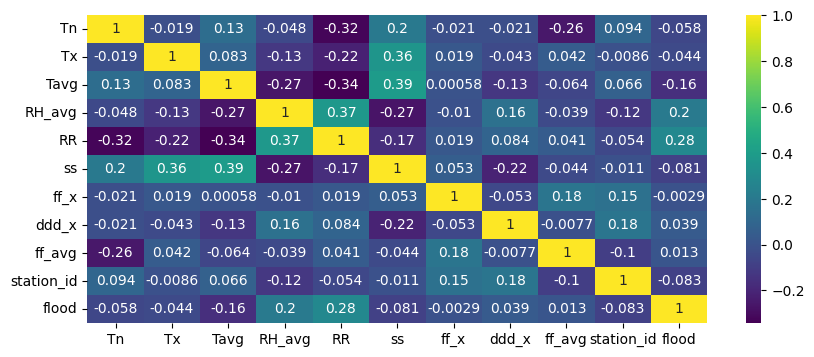

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# heatmap korelasi untuk kolom numerik dalam dataset
plt.figure(figsize=(10, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')  # Menggunakan skema warna 'viridis'
plt.show()


In [ ]:
# Menghitung jumlah nilai null di setiap kolom
jumlah_null = data.isnull().sum()

# Menampilkan jumlah nilai null di setiap kolom
print(jumlah_null)

date               0
Tn               312
Tx               213
Tavg              46
RH_avg            52
RR              2315
ss              1259
ff_x              22
ddd_x             22
ff_avg            93
ddd_car          101
station_id         0
station_name       0
region_name        0
flood              0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Baca file CSV
data = pd.read_csv('data_banjir_Jakarta.csv')

# Hapus duplikat
data = data.drop_duplicates()

# Variabel untuk kolom yang akan diimputasi
cols_to_impute = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

# Inisialisasi LabelEncoder untuk kolom kategorikal
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom 'region_name', 'station_name', dan 'ddd_car' menjadi numerik
data['region_name'] = label_encoder.fit_transform(data['region_name'])
data['station_name'] = label_encoder.fit_transform(data['station_name'])
data['ddd_car'] = label_encoder.fit_transform(data['ddd_car'])

# Membuat subset dari DataFrame yang hanya berisi kolom-kolom yang akan diimputasi
data_subset = data[cols_to_impute]

# Tampilkan DataFrame setelah label encoding
print("DataFrame setelah label encoding:")
print(data.head())



DataFrame setelah label encoding:
         date    Tn    Tx  Tavg  RH_avg    RR   ss  ff_x  ddd_x  ff_avg  \
0  2016-01-01  26.0  34.8  28.6    81.0   NaN  5.8   5.0  280.0     2.0   
1  2016-01-02  25.6  33.2  27.0    88.0   1.6  8.7   4.0  290.0     2.0   
2  2016-01-03  24.4  34.9  28.1    80.0  33.8  5.4   4.0  280.0     2.0   
3  2016-01-04  24.8  33.6  29.2    81.0   NaN  6.6   3.0  200.0     1.0   
4  2016-01-05  25.8  33.6  26.7    91.0   NaN  3.2   3.0  180.0     1.0   

   ddd_car  station_id  station_name  region_name  flood  
0        5       96733             1            1      0  
1        8       96733             1            1      1  
2        7       96733             1            1      1  
3        5       96733             1            1      0  
4        5       96733             1            1      0  


In [ ]:
from sklearn.impute import KNNImputer

# Inisialisasi KNN Imputer dengan jumlah tetangga terdekat = 5
imputer = KNNImputer(n_neighbors=5)

# Melakukan imputasi pada subset data
data_subset_imputed = imputer.fit_transform(data_subset)

# Konversi array hasil imputasi menjadi DataFrame
data_subset_imputed = pd.DataFrame(data_subset_imputed, columns=data_subset.columns)

# Gabungkan dengan kolom lainnya
data_imputed = pd.concat([data.drop(columns=cols_to_impute), data_subset_imputed], axis=1)

# Tampilkan DataFrame hasil imputasi
print("\nDataFrame hasil imputasi:")
print(data_imputed.head())



DataFrame hasil imputasi:
         date  station_id  station_name  region_name  flood    Tn    Tx  Tavg  \
0  2016-01-01       96733             1            1      0  26.0  34.8  28.6   
1  2016-01-02       96733             1            1      1  25.6  33.2  27.0   
2  2016-01-03       96733             1            1      1  24.4  34.9  28.1   
3  2016-01-04       96733             1            1      0  24.8  33.6  29.2   
4  2016-01-05       96733             1            1      0  25.8  33.6  26.7   

   RH_avg     RR   ss  ff_x  ddd_x  ff_avg  ddd_car  
0    81.0  10.36  5.8   5.0  280.0     2.0      5.0  
1    88.0   1.60  8.7   4.0  290.0     2.0      8.0  
2    80.0  33.80  5.4   4.0  280.0     2.0      7.0  
3    81.0  34.34  6.6   3.0  200.0     1.0      5.0  
4    91.0   6.86  3.2   3.0  180.0     1.0      5.0  


In [ ]:
data_new = data_imputed.copy()

In [ ]:
data_new

,date,station_id,station_name,region_name,flood,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2016-01-01,96733,1,1,0,26.0,34.8,28.6,81.0,10.36,5.80,5.0,280.0,2.0,5.0
1,2016-01-02,96733,1,1,1,25.6,33.2,27.0,88.0,1.60,8.70,4.0,290.0,2.0,8.0
2,2016-01-03,96733,1,1,1,24.4,34.9,28.1,80.0,33.80,5.40,4.0,280.0,2.0,7.0
3,2016-01-04,96733,1,1,0,24.8,33.6,29.2,81.0,34.34,6.60,3.0,200.0,1.0,5.0
4,2016-01-05,96733,1,1,0,25.8,33.6,26.7,91.0,6.86,3.20,3.0,180.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,96747,0,2,0,23.8,32.0,28.0,70.0,11.94,5.72,12.0,180.0,5.0,8.0
6304,2018-12-28,96747,0,2,0,24.0,33.4,28.5,69.0,1.76,5.34,14.0,250.0,3.0,6.0
6305,2018-12-29,96747,0,2,0,25.2,33.4,28.7,70.0,6.30,7.28,14.0,120.0,5.0,7.0
6306,2018-12-30,96747,0,2,0,24.0,34.4,30.0,64.0,7.62,3.82,14.0,240.0,5.0,8.0


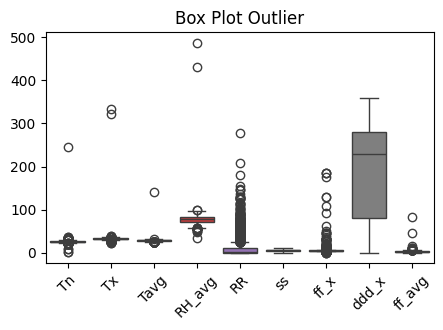

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Variabel numerik
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Membuat box plot untuk melihat outlier dari variabel numerik dari data_new
plt.figure(figsize=(5, 3))
sns.boxplot(data=data_new[numeric_columns])
plt.title('Box Plot Outlier')
plt.xticks(rotation=45)
plt.show()


Jumlah Outlier sebelum dibersihkan: 2065
Jumlah Outlier setelah dibersihkan: 0
         date  station_id  station_name  region_name  flood    Tn    Tx  Tavg  \
0  2016-01-01       96733             1            1      0  26.0  34.8  28.6   
1  2016-01-02       96733             1            1      1  25.6  33.2  27.0   
2  2016-01-03       96733             1            1      1  24.4  34.9  28.1   
3  2016-01-04       96733             1            1      0  24.8  33.6  29.2   
4  2016-01-05       96733             1            1      0  25.8  33.6  26.7   

   RH_avg     RR   ss  ff_x  ddd_x  ff_avg  ddd_car  
0    81.0  10.36  5.8   5.0  280.0     2.0      5.0  
1    88.0   1.60  8.7   4.0  290.0     2.0      8.0  
2    80.0   2.04  5.4   4.0  280.0     2.0      7.0  
3    81.0   2.04  6.6   3.0  200.0     1.0      5.0  
4    91.0   6.86  3.2   3.0  180.0     1.0      5.0  


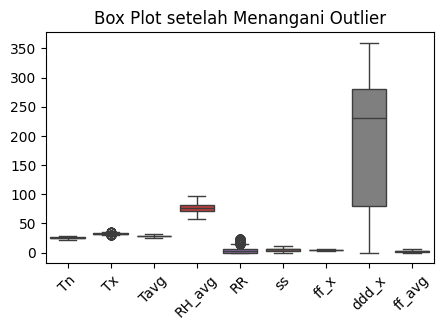

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom yang ingin diperiksa untuk outlier
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Inisialisasi variabel untuk menyimpan jumlah outlier sebelum dan setelah dibersihkan
jumlah_outlier_sebelum = 0
jumlah_outlier_sesudah = 0

# Loop melalui setiap kolom untuk mengganti outlier dengan median
for col in numeric_columns:
    q1 = data_new[col].quantile(0.25)
    q3 = data_new[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Menghitung jumlah outlier sebelum dibersihkan
    jumlah_outlier_sebelum += data_new[col][(data_new[col] < lower_bound) | (data_new[col] > upper_bound)].count()

    # Mengganti outlier dengan nilai median
    median_val = data_new[col].median()
    data_new.loc[(data_new[col] < lower_bound) | (data_new[col] > upper_bound), col] = median_val

    # Menghitung jumlah outlier setelah dibersihkan
    jumlah_outlier_sesudah += data_new[col][(data_new[col] < lower_bound) | (data_new[col] > upper_bound)].count()

# Tampilkan jumlah outlier sebelum dan setelah dibersihkan
print("Jumlah Outlier sebelum dibersihkan:", jumlah_outlier_sebelum)
print("Jumlah Outlier setelah dibersihkan:", jumlah_outlier_sesudah)

# Tampilkan DataFrame setelah penggantian outlier
print(data_new.head())

# Membuat box plot setelah nilai outlier diperbaiki dengan nilai median
plt.figure(figsize=(5, 3))
sns.boxplot(data=data_new[numeric_columns])
plt.title('Box Plot setelah Menangani Outlier')
plt.xticks(rotation=45)
plt.show()


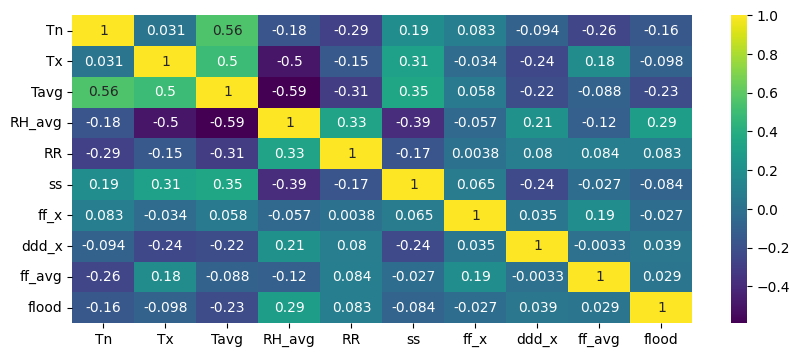

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mengambil kolom numerik
numeric_columns = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'flood']
numeric_data_new = data_new[numeric_columns]

# heatmap korelasi untuk kolom numerik dalam dataset
plt.figure(figsize=(10, 4))
sns.heatmap(numeric_data_new.corr(), annot=True, cmap='viridis')  # Menggunakan skema warna 'viridis'
plt.show()


In [ ]:
# Menghitung jumlah nilai null di setiap kolom
jumlah_null = data_new.isnull().sum()

# Menampilkan jumlah nilai null di setiap kolom
print(jumlah_null)

date            0
station_id      0
station_name    0
region_name     0
flood           0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
ddd_car         0
dtype: int64


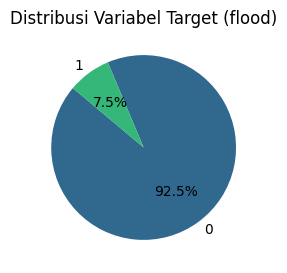

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan setiap kategori dalam variabel 'flood'
flood_counts = data_new['flood'].value_counts()

# Skema warna sequential
colors = sns.color_palette('viridis', len(flood_counts))

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(flood_counts, labels=flood_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Variabel Target (flood)')
plt.show()


In [ ]:
# Konversi kolom 'flood' kembali menjadi tipe data integer untuk analisis selanjutnya
data_new['flood'] = data_new['flood'].astype(int)


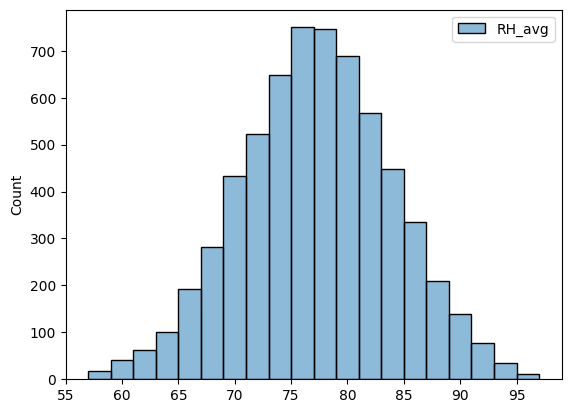

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memeriksa distribusi dari variabel numerik
numeric_columns = ['RH_avg']
sns.histplot(data_new[numeric_columns], bins=20, kde=False, color='viridis')
plt.show()


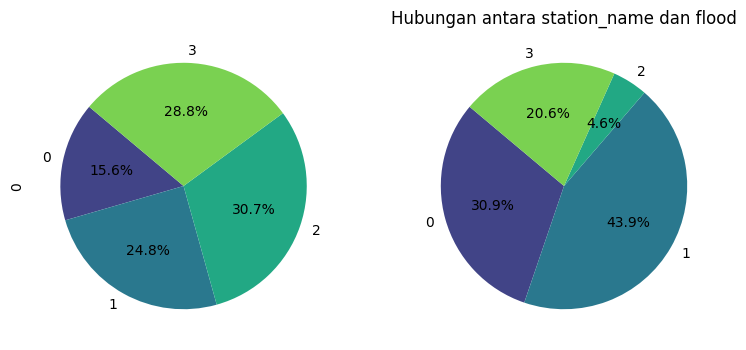

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah kemunculan setiap kategori 'station_name' untuk setiap nilai 'flood'
station_flood_counts = data_new.groupby(['station_name', 'flood']).size().unstack()

# Skema warna sequential
colors = sns.color_palette('viridis', len(station_flood_counts))

# Plot pie chart untuk setiap kategori 'station_name'
station_flood_counts.plot(kind='pie', subplots=True, figsize=(9, 4), autopct='%1.1f%%', startangle=140, legend=False, colors=colors)
plt.title('Hubungan antara station_name dan flood')
plt.ylabel('')  # Menghapus label sumbu y
plt.show()


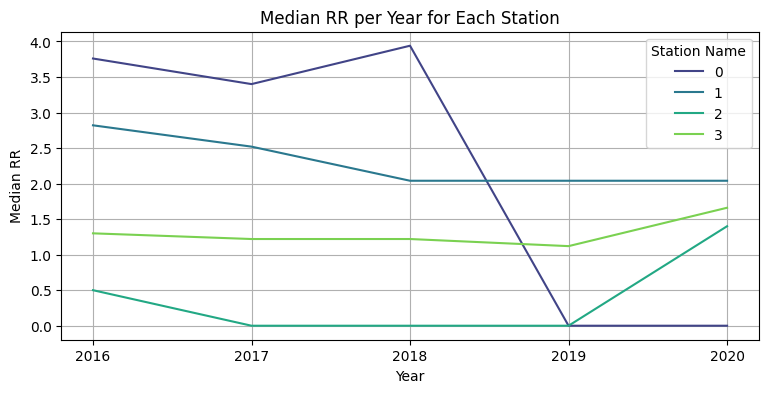

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom date dan RR adalah tipe data yang benar
data_new['date'] = pd.to_datetime(data_new['date'])
data_new['RR'] = pd.to_numeric(data_new['RR'], errors='coerce')

# Ekstrak tahun dari kolom date
data_new['year'] = data_new['date'].dt.year

# Group by 'year' dan 'station_name', kemudian hitung median RR
grouped_data = data_new.groupby(['year', 'station_name'])['RR'].median().unstack(fill_value=0)

# Skema warna sequential
colors = sns.color_palette('viridis', len(grouped_data.columns))

# Buat diagram garis
grouped_data.plot.line(figsize=(9, 4), color=colors)  # Menghilangkan marker='o'

plt.xlabel('Year')
plt.ylabel('Median RR')
plt.title('Median RR per Year for Each Station')
plt.legend(title='Station Name')
plt.grid(True)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.show()


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="region_name")
address0 = "Jakarta Pusat"
address1 = "Jakarta Selatan"
address2 = "Jakarta Timur"
address3 = "Jakarta Utara"

location = geolocator.geocode(address0)
print((location.latitude, location.longitude))

location = geolocator.geocode(address1)
print((location.latitude, location.longitude))

location = geolocator.geocode(address2)
print((location.latitude, location.longitude))

location = geolocator.geocode(address3)
print((location.latitude, location.longitude))

(-6.18233995, 106.84287153600738)
(-6.28381815, 106.80486325728526)
(-6.26289085, 106.88222894692834)
(-6.136197, 106.90069022428446)


In [ ]:
import pandas as pd

# Anggap Anda sudah memiliki data latitude dan longitude yang disimpan dalam bentuk kamus
region_coordinates = {
    0: (-6.18233995, 106.84287153600738),
    1: (-6.28381815, 106.80486325728526),
    2: (-6.26289085, 106.88222894692834),
    3: (-6.136197, 106.90069022428446)
}


# Buat kolom baru untuk latitude dan longitude
data_new['latitude'] = data_new['region_name'].map(lambda x: region_coordinates[int(x)][0])
data_new['longitude'] = data_new['region_name'].map(lambda x: region_coordinates[int(x)][1])

# Buat kolom baru 'coordinates' yang menggabungkan latitude dan longitude
data_new['coordinates'] = list(zip(data_new['latitude'], data_new['longitude']))

# Tampilkan dataset yang telah dimodifikasi
print(data_new.head())


        date  station_id  station_name  region_name  flood    Tn    Tx  Tavg  \
0 2016-01-01       96733             1            1      0  26.0  34.8  28.6   
1 2016-01-02       96733             1            1      1  25.6  33.2  27.0   
2 2016-01-03       96733             1            1      1  24.4  34.9  28.1   
3 2016-01-04       96733             1            1      0  24.8  33.6  29.2   
4 2016-01-05       96733             1            1      0  25.8  33.6  26.7   

   RH_avg     RR   ss  ff_x  ddd_x  ff_avg  ddd_car  year  latitude  \
0    81.0  10.36  5.8   5.0  280.0     2.0      5.0  2016 -6.283818   
1    88.0   1.60  8.7   4.0  290.0     2.0      8.0  2016 -6.283818   
2    80.0   2.04  5.4   4.0  280.0     2.0      7.0  2016 -6.283818   
3    81.0   2.04  6.6   3.0  200.0     1.0      5.0  2016 -6.283818   
4    91.0   6.86  3.2   3.0  180.0     1.0      5.0  2016 -6.283818   

    longitude                        coordinates  
0  106.804863  (-6.28381815, 106.80486325

In [ ]:
data_new

,date,station_id,station_name,region_name,flood,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,year,latitude,longitude,coordinates
0,2016-01-01,96733,1,1,0,26.0,34.8,28.6,81.0,10.36,5.80,5.0,280.0,2.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
1,2016-01-02,96733,1,1,1,25.6,33.2,27.0,88.0,1.60,8.70,4.0,290.0,2.0,8.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
2,2016-01-03,96733,1,1,1,24.4,34.9,28.1,80.0,2.04,5.40,4.0,280.0,2.0,7.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
3,2016-01-04,96733,1,1,0,24.8,33.6,29.2,81.0,2.04,6.60,3.0,200.0,1.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
4,2016-01-05,96733,1,1,0,25.8,33.6,26.7,91.0,6.86,3.20,3.0,180.0,1.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,96747,0,2,0,23.8,32.0,28.0,70.0,11.94,5.72,4.0,180.0,5.0,8.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6304,2018-12-28,96747,0,2,0,24.0,33.4,28.5,69.0,1.76,5.34,4.0,250.0,3.0,6.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6305,2018-12-29,96747,0,2,0,25.2,33.4,28.7,70.0,6.30,7.28,4.0,120.0,5.0,7.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6306,2018-12-30,96747,0,2,0,24.0,34.4,30.0,64.0,7.62,3.82,4.0,240.0,5.0,8.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"


In [ ]:
import plotly.express as px
import pandas as pd

# Filter data for the year range 2016 to 2018
filtered_data = data_new[(data_new['date'] >= '2016-01-01') & (data_new['date'] <= '2018-12-31')]

# Map region codes to region names
region_mapping = {0: "Jakarta Pusat", 1: "Jakarta Selatan", 2: "Jakarta Timur", 3: "Jakarta Utara"}
filtered_data.loc[:, 'region_name'] = filtered_data['region_name'].map(region_mapping)

# Calculate mean RR for each region
mean_rr_by_region = filtered_data.groupby('region_name')['RR'].mean().reset_index()

# Define the coordinates for each region
region_coordinates = {
    "Jakarta Pusat": (-6.18233995, 106.84287153600738),
    "Jakarta Selatan": (-6.28381815, 106.80486325728526),
    "Jakarta Timur": (-6.26289085, 106.88222894692834),
    "Jakarta Utara": (-6.136197, 106.90069022428446)
}

# Map coordinates to the mean_rr_by_region DataFrame
mean_rr_by_region['latitude'] = mean_rr_by_region['region_name'].map(lambda x: region_coordinates[x][0])
mean_rr_by_region['longitude'] = mean_rr_by_region['region_name'].map(lambda x: region_coordinates[x][1])

# Add a constant size for all markers
mean_rr_by_region['size'] = 15  # You can adjust this size as needed

# Plot the data
fig = px.scatter_mapbox(mean_rr_by_region,
                         lat="latitude",
                         lon="longitude",
                         color="RR",
                         color_continuous_scale="Viridis",  # Menggunakan skema warna sequential 'Viridis'
                         size="size",
                         size_max=50,  # Increased max size for larger markers
                         zoom=9,
                         hover_data={'region_name': True, 'RR': True})

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(title="Average Rainfall Rate by Region")
fig.update_traces(hovertemplate='<br>'.join(['Region: %{customdata[0]}', 'Rainfall Rate: %{customdata[1]}']))

fig.show()


In [ ]:
import plotly.graph_objects as go

# Dummy data for demonstration purposes
mean_values_by_region = {
    'Jakarta Pusat': {'latitude': -6.18233995, 'longitude': 106.84287153600738, 'Tavg': 28.607695700110256, 'RH_avg': 75.9779492833517, 'RR': 2.733550165380375},
    'Jakarta Selatan': {'latitude': -6.28381815, 'longitude': 106.80486325728526, 'Tavg': 28.02185765983112, 'RH_avg': 78.75379975874547, 'RR': 5.319264173703257},
    'Jakarta Timur': {'latitude': -6.26289085, 'longitude': 106.88222894692834, 'Tavg': 27.93135288552507, 'RH_avg': 76.67455061494796, 'RR': 5.970842005676443},
    'Jakarta Utara': {'latitude': -6.136197, 'longitude': 106.90069022428446, 'Tavg': 28.753940415964024, 'RH_avg': 76.01000562113546, 'RR': 3.207779651489601}
}

# Function to create map figure for each variable
def create_map_figure(data, variable, title, marker_size, marker_opacity):
    # Generate hover texts
    hover_texts = [f"Region: {region_name}<br>{title}: {data[region_name][variable]:.2f}" for region_name in data]

    # Create scatter mapbox figure
    fig = go.Figure(go.Scattermapbox(
        lat=[data[region_name]['latitude'] for region_name in data],
        lon=[data[region_name]['longitude'] for region_name in data],
        mode='markers',
        marker=dict(
            size=marker_size,
            color=[data[region_name][variable] for region_name in data],
            colorscale='Viridis',
            colorbar=dict(title=title),
            opacity=marker_opacity  # Adjust opacity here
        ),
        hovertext=hover_texts,
        name=title
    ))

    # Update layout for the map
    fig.update_layout(
        mapbox=dict(
            style="carto-positron",
            zoom=9,  # Adjusted zoom level for more precise view
            center=dict(lat=-6.22, lon=106.85)  # Adjusted center for more precise view
        ),
        title=f"Jakarta Climate Overview: Average {title}"  # Add title here
    )

    return fig

# Create map figures for each variable with larger markers and lower opacity
fig_temperature = create_map_figure(mean_values_by_region, 'Tavg', 'Temperature (°C)', 70, 0.7)
fig_humidity = create_map_figure(mean_values_by_region, 'RH_avg', 'Humidity (%)', 70, 0.7)
fig_rainfall = create_map_figure(mean_values_by_region, 'RR', 'Rainfall Rate', 70, 0.7)

# Display figures
fig_temperature.show()
fig_humidity.show()
fig_rainfall.show()

In [ ]:
data_new

,date,station_id,station_name,region_name,flood,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,year,latitude,longitude,coordinates
0,2016-01-01,96733,1,1,0,26.0,34.8,28.6,81.0,10.36,5.80,5.0,280.0,2.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
1,2016-01-02,96733,1,1,1,25.6,33.2,27.0,88.0,1.60,8.70,4.0,290.0,2.0,8.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
2,2016-01-03,96733,1,1,1,24.4,34.9,28.1,80.0,2.04,5.40,4.0,280.0,2.0,7.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
3,2016-01-04,96733,1,1,0,24.8,33.6,29.2,81.0,2.04,6.60,3.0,200.0,1.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
4,2016-01-05,96733,1,1,0,25.8,33.6,26.7,91.0,6.86,3.20,3.0,180.0,1.0,5.0,2016,-6.283818,106.804863,"(-6.28381815, 106.80486325728526)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,96747,0,2,0,23.8,32.0,28.0,70.0,11.94,5.72,4.0,180.0,5.0,8.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6304,2018-12-28,96747,0,2,0,24.0,33.4,28.5,69.0,1.76,5.34,4.0,250.0,3.0,6.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6305,2018-12-29,96747,0,2,0,25.2,33.4,28.7,70.0,6.30,7.28,4.0,120.0,5.0,7.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"
6306,2018-12-30,96747,0,2,0,24.0,34.4,30.0,64.0,7.62,3.82,4.0,240.0,5.0,8.0,2018,-6.262891,106.882229,"(-6.26289085, 106.88222894692834)"


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          6308 non-null   datetime64[ns]
 1   station_id    6308 non-null   int64         
 2   station_name  6308 non-null   int64         
 3   region_name   6308 non-null   int64         
 4   flood         6308 non-null   int64         
 5   Tn            6308 non-null   float64       
 6   Tx            6308 non-null   float64       
 7   Tavg          6308 non-null   float64       
 8   RH_avg        6308 non-null   float64       
 9   RR            6308 non-null   float64       
 10  ss            6308 non-null   float64       
 11  ff_x          6308 non-null   float64       
 12  ddd_x         6308 non-null   float64       
 13  ff_avg        6308 non-null   float64       
 14  ddd_car       6308 non-null   float64       
 15  year          6308 non-null   int32   

In [ ]:
# Menghapus kolom 'latitude', 'longitude', 'date', 'coordinates', dan 'year'
data_new = data_new.drop(columns=['latitude', 'longitude', 'date', 'coordinates', 'year'])

# Memastikan perubahan telah dilakukan
print(data_new.head())


   station_id  station_name  region_name  flood    Tn    Tx  Tavg  RH_avg  \
0       96733             1            1      0  26.0  34.8  28.6    81.0   
1       96733             1            1      1  25.6  33.2  27.0    88.0   
2       96733             1            1      1  24.4  34.9  28.1    80.0   
3       96733             1            1      0  24.8  33.6  29.2    81.0   
4       96733             1            1      0  25.8  33.6  26.7    91.0   

      RR   ss  ff_x  ddd_x  ff_avg  ddd_car  
0  10.36  5.8   5.0  280.0     2.0      5.0  
1   1.60  8.7   4.0  290.0     2.0      8.0  
2   2.04  5.4   4.0  280.0     2.0      7.0  
3   2.04  6.6   3.0  200.0     1.0      5.0  
4   6.86  3.2   3.0  180.0     1.0      5.0  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Memisahkan fitur dan label
X = data_new.drop('flood', axis=1)
y = data_new['flood']

In [ ]:
#Pembagian Data Train dan Data Test:
#- Membagi dataset menjadi data train dan data test untuk evaluasi model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_test

,station_id,station_name,region_name,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
1893,96741,3,3,27.0,33.00,29.5,72.0,0.00,5.9,4.0,30.0,2.0,2.0
351,96733,1,1,25.0,32.40,29.0,81.0,19.80,3.0,3.0,250.0,1.0,2.0
1498,96733,1,1,25.8,33.20,28.8,76.0,1.28,8.8,3.0,170.0,1.0,0.0
5813,96747,0,2,24.0,34.40,28.6,61.0,1.12,7.0,4.0,60.0,5.0,3.0
599,96733,1,1,24.0,34.00,27.1,84.0,7.80,4.4,4.0,260.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,96745,2,0,26.0,32.80,28.9,69.0,0.00,2.0,5.0,240.0,3.0,8.0
4264,96745,2,0,26.0,33.60,29.6,74.0,0.00,6.0,4.0,200.0,2.0,2.0
4308,96745,2,0,27.0,32.80,29.3,75.0,0.00,3.6,4.0,120.0,1.0,2.0
5205,96745,2,0,27.6,35.00,29.7,74.0,0.00,7.6,6.0,190.0,2.0,0.0


In [ ]:
X_train

,station_id,station_name,region_name,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
838,96733,1,1,26.0,31.8,28.2,74.0,4.26,0.80,4.0,60.0,4.0,1.0
1087,96733,1,1,26.0,34.3,29.8,71.0,0.02,6.10,4.0,70.0,2.0,1.0
5280,96747,0,2,25.4,32.4,28.4,77.0,4.40,5.56,4.0,300.0,3.0,6.0
4582,96745,2,0,27.0,33.0,29.3,76.0,0.00,4.20,4.0,340.0,1.0,0.0
1665,96741,3,3,27.0,33.4,30.1,72.0,1.88,7.30,4.0,20.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,96745,2,0,26.0,31.2,28.5,73.0,0.00,0.00,5.0,260.0,2.0,8.0
5191,96745,2,0,25.8,32.4,28.6,75.0,7.00,3.50,5.0,240.0,2.0,0.0
5226,96745,2,0,24.2,30.2,26.1,88.0,2.04,0.00,3.0,320.0,1.0,0.0
5390,96747,0,2,24.0,33.4,27.8,74.0,4.04,5.16,3.0,40.0,1.0,3.0


In [ ]:
y_train

838     0
1087    0
5280    1
4582    0
1665    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: flood, Length: 4731, dtype: int64

In [ ]:
# Import libraries
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Inisialisasi dan latih model SVM
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

# Inisialisasi dan latih model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Inisialisasi dan latih model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Prediksi menggunakan data uji
svm_pred = svm_model.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Evaluasi akurasi
svm_accuracy = accuracy_score(y_test, svm_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

# Menampilkan akurasi masing-masing model
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)


SVM Accuracy: 0.9188332276474318
Decision Tree Accuracy: 0.8630310716550412
Random Forest Accuracy: 0.9143944197844007


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Menampilkan beberapa hasil prediksi dari setiap model
print("SVM Predictions:", svm_pred)
print("Decision Tree Predictions:", dt_pred)
print("Random Forest Predictions:", rf_pred)


SVM Predictions: [0 0 0 ... 0 0 0]
Decision Tree Predictions: [0 0 0 ... 0 0 0]
Random Forest Predictions: [0 0 0 ... 0 0 0]


In [ ]:
y_test

1893    0
351     0
1498    0
5813    0
599     0
       ..
4173    0
4264    0
4308    0
5205    0
3540    0
Name: flood, Length: 1577, dtype: int64

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Actual target values
actual = y_test

# Create confusion matrices
svm_cm = confusion_matrix(actual, svm_pred)
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)

# Function to convert confusion matrices to DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
svm_cm_df = confusion_matrix_to_dataframe(svm_cm)
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)

# Display the DataFrames
print("SVM Confusion Matrix:\n", svm_cm_df)
print("Decision Tree Confusion Matrix:\n", dt_cm_df)
print("Random Forest Confusion Matrix:\n", rf_cm_df)


SVM Confusion Matrix:
 Predicted     0  1
Actual            
0          1449  0
1           128  0
Decision Tree Confusion Matrix:
 Predicted     0    1
Actual              
0          1330  119
1           101   27
Random Forest Confusion Matrix:
 Predicted     0  1
Actual            
0          1441  8
1           127  1


In [ ]:
svm_cm_df

# Untuk KNN
# Prediksi nya 0 Actualnya 0 Jumlahnya 1154
# Prediksi nya 1 Actualnya 0 Jumlahnya 0
# Prediksi nya 0 Actualnya 1 Jumlahnya 108
# Prediksi nya 1 Actualnya 1 Jumlahnya 0

Predicted,0,1
Actual,,
0,1449,0
1,128,0


In [ ]:
dt_cm_df

# Decision Tree
# Prediksi nya 0 Actualnya 0 Jumlahnya 1076
# Prediksi nya 1 Actualnya 0 Jumlahnya 78
# Prediksi nya 0 Actualnya 1 Jumlahnya 85
# Prediksi nya 1 Actualnya 1 Jumlahnya 23

Predicted,0,1
Actual,,
0,1330,119
1,101,27


In [ ]:
rf_cm_df

#3. Untuk Random Forest
# Prediksi nya 0 Actualnya 0 Jumlahnya 1150
# Prediksi nya 1 Actualnya 0 Jumlahnya 4
# Prediksi nya 0 Actualnya 1 Jumlahnya 107
# Prediksi nya 1 Actualnya 1 Jumlahnya 1

Predicted,0,1
Actual,,
0,1441,8
1,127,1


In [ ]:
# Catatan
# 1. Jika Prediksi nya itu 0 dan Aktual nya itu 0 berati True Negative
# 2. Jika Prediksi nya itu 1 dan Aktual nya itu 0 berati False Positive
# 3. Jika Predisi nya itu 0 dan Aktual nya itu 1 berati False Negative
# 4. Jika Predisi nya itu 1 dan Aktual nya itu 1 berati True Positive

Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1449
           1       0.00      0.00      0.00       128

    accuracy                           0.92      1577
   macro avg       0.46      0.50      0.48      1577
weighted avg       0.84      0.92      0.88      1577

Klasifikasi Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1449
           1       0.20      0.22      0.21       128

    accuracy                           0.86      1577
   macro avg       0.56      0.57      0.57      1577
weighted avg       0.87      0.86      0.87      1577

Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1449
           1       0.40      0.02      0.03       128

    accuracy                           0.92      1577
   macro avg       0.66      0.51      0.49      1577
wei

<ipython-input-43-7722267cb3a7>:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




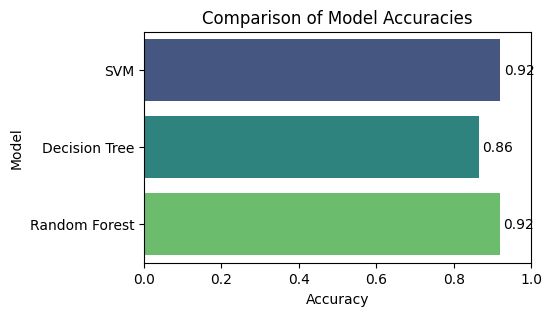

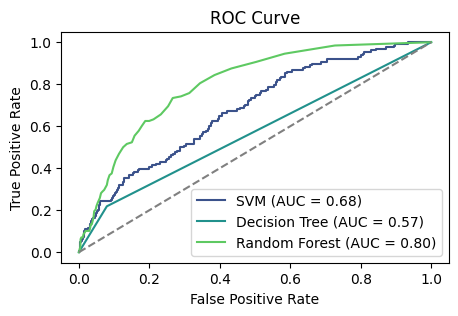

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Melatih model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Melakukan prediksi
svm_pred = svm.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Evaluasi dengan classification reports
print("Klasifikasi SVM:")
print(classification_report(y_test, svm_pred, zero_division=0))

print("Klasifikasi Decision Tree:")
print(classification_report(y_test, decision_tree_pred, zero_division=0))

print("Klasifikasi Random Forest:")
print(classification_report(y_test, random_forest_pred, zero_division=0))

# Menghitung akurasi
svm_accuracy = accuracy_score(y_test, svm_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

# Menghitung F1-score untuk kelas 1 (banjir)
svm_precision = precision_score(y_test, svm_pred, pos_label=1, zero_division=0)
svm_recall = recall_score(y_test, svm_pred, pos_label=1, zero_division=0)
svm_f1 = f1_score(y_test, svm_pred, pos_label=1, zero_division=0)

decision_tree_precision = precision_score(y_test, decision_tree_pred, pos_label=1, zero_division=0)
decision_tree_recall = recall_score(y_test, decision_tree_pred, pos_label=1, zero_division=0)
decision_tree_f1 = f1_score(y_test, decision_tree_pred, pos_label=1, zero_division=0)

random_forest_precision = precision_score(y_test, random_forest_pred, pos_label=1, zero_division=0)
random_forest_recall = recall_score(y_test, random_forest_pred, pos_label=1, zero_division=0)
random_forest_f1 = f1_score(y_test, random_forest_pred, pos_label=1, zero_division=0)

# Cetak F1-score untuk kelas 1 (banjir)
print(f"SVM F1-Score untuk kelas 1 (banjir): {svm_f1}")
print(f"Decision Tree F1-Score untuk kelas 1 (banjir): {decision_tree_f1}")
print(f"Random Forest F1-Score untuk kelas 1 (banjir): {random_forest_f1}")

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)

print("Confusion Matrix SVM:")
print(svm_cm)

print("Confusion Matrix Decision Tree:")
print(decision_tree_cm)

print("Confusion Matrix Random Forest:")
print(random_forest_cm)
print("\n")

# ROC-AUC Score
svm_roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
random_forest_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

print(f"SVM ROC-AUC Score: {svm_roc_auc}")
print(f"Decision Tree ROC-AUC Score: {decision_tree_roc_auc}")
print(f"Random Forest ROC-AUC Score: {random_forest_roc_auc}")

# Data untuk bar chart
models = ['SVM', 'Decision Tree', 'Random Forest']
accuracies = [svm_accuracy, decision_tree_accuracy, random_forest_accuracy]

# Membuat bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x=accuracies, y=models, palette='viridis')  # Menggunakan skema warna sequential 'viridis'
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)

# Menambahkan presentasi nilai di sumbu y
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()

# Plot ROC Curve
plt.figure(figsize=(5, 3))
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
decision_tree_fpr, decision_tree_tpr, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])

plt.plot(svm_fpr, svm_tpr, color=sns.color_palette('viridis', 3)[0], label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr, color=sns.color_palette('viridis', 3)[1], label='Decision Tree (AUC = %0.2f)' % decision_tree_roc_auc)
plt.plot(random_forest_fpr, random_forest_tpr, color=sns.color_palette('viridis', 3)[2], label='Random Forest (AUC = %0.2f)' % random_forest_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Top 5 SVM (Linear Kernel) Feature Importances:
     Feature  Importance
      RH_avg 1560.401169
          RR  377.514512
        Tavg  186.336994
          Tn  181.565394
station_name  165.399613


<ipython-input-44-3fc87b51c8a6>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




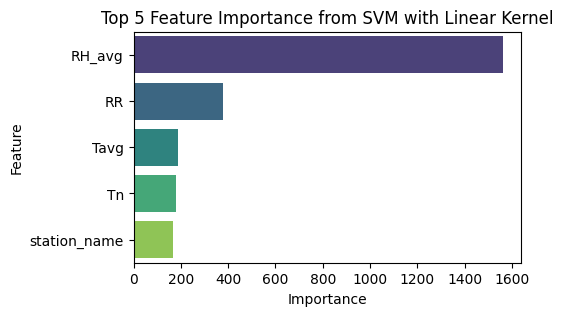

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan X_train dan y_train telah didefinisikan sebelumnya

# Membuat dan melatih model SVM dengan kernel linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Mendapatkan koefisien dari model SVM dengan kernel linear
coef = svm_linear.coef_.ravel()
feature_names = X_train.columns

# Membuat DataFrame untuk feature importance berdasarkan koefisien
svm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coef)})

# Mengurutkan DataFrame berdasarkan importance secara menurun
svm_feature_importance_df = svm_feature_importance_df.sort_values(by='Importance', ascending=False)

# Mengambil hanya 5 variabel teratas
top_svm_feature_importance_df = svm_feature_importance_df.head(5)

# Menampilkan DataFrame feature importance dari model SVM dengan kernel linear
print("\nTop 5 SVM (Linear Kernel) Feature Importances:")
print(top_svm_feature_importance_df.to_string(index=False))

# Plotting feature importance
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=top_svm_feature_importance_df, palette='viridis')  # Menggunakan skema warna sequential 'viridis'
plt.xlabel('Importance')
plt.title('Top 5 Feature Importance from SVM with Linear Kernel')
plt.show()



Top 5 Decision Tree Feature Importances:
Feature  Importance
 RH_avg    0.158518
     RR    0.132769
   Tavg    0.126752
     ss    0.118557
     Tx    0.117578


<ipython-input-45-f61f361ade7d>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




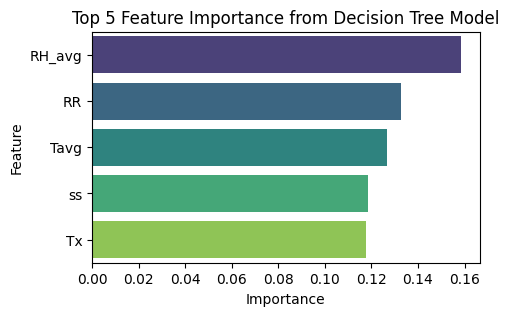

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan X_train dan y_train telah didefinisikan sebelumnya

# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree
decision_tree.fit(X_train, y_train)

# Mendapatkan feature importance dari model Decision Tree
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Membuat DataFrame untuk feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Mengurutkan DataFrame berdasarkan importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mengambil hanya 5 variabel teratas
top_feature_importance_df = feature_importance_df.head(5)

# Menampilkan DataFrame feature importance dari model Decision Tree dengan 5 variabel teratas
print("\nTop 5 Decision Tree Feature Importances:")
print(top_feature_importance_df.to_string(index=False))

# Plotting feature importance
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=top_feature_importance_df, palette='viridis')  # Menggunakan skema warna sequential 'viridis'
plt.xlabel('Importance')
plt.title('Top 5 Feature Importance from Decision Tree Model')
plt.show()



Top 5 Random Forest Feature Importances:
Feature  Importance
 RH_avg    0.153725
     ss    0.120784
   Tavg    0.119504
     RR    0.108678
     Tx    0.100885


<ipython-input-46-744fc6e1f0f6>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




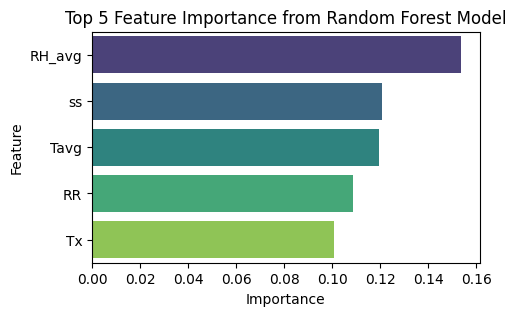

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan X_train dan y_train telah didefinisikan sebelumnya

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest
random_forest.fit(X_train, y_train)

# Mengambil 5 variabel teratas berdasarkan importance
top_features = 5

# Mendapatkan importance dari model Random Forest
rf_feature_importance = random_forest.feature_importances_

# Mendapatkan nama-nama fitur
feature_names = X_train.columns

# Membuat DataFrame untuk feature importance dari model Random Forest
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

# Mengurutkan DataFrame berdasarkan importance secara menurun
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Mengambil hanya 5 variabel teratas
top_rf_feature_importance_df = rf_feature_importance_df.head(top_features)

# Menampilkan DataFrame feature importance dari model Random Forest dengan 5 variabel teratas
print("\nTop 5 Random Forest Feature Importances:")
print(top_rf_feature_importance_df.to_string(index=False))

# Plotting feature importance
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=top_rf_feature_importance_df, palette='viridis')  # Menggunakan skema warna sequential 'viridis'
plt.xlabel('Importance')
plt.title('Top 5 Feature Importance from Random Forest Model')
plt.show()


In [ ]:
import pandas as pd

data = data_new
df = pd.DataFrame(data)

# Group by 'Region' and calculate the mean for each column
mean_values_by_region = df.groupby('region_name').agg({'Tavg': 'mean', 'RH_avg': 'mean', 'RR': 'mean', 'ss': 'mean'}).to_dict('index')

print("Mean values by region:")
print(mean_values_by_region)

Mean values by region:
{0: {'Tavg': 28.607695700110256, 'RH_avg': 75.9779492833517, 'RR': 2.733550165380375, 'ss': 4.523991179713341}, 1: {'Tavg': 28.02185765983112, 'RH_avg': 78.75379975874547, 'RR': 5.319264173703257, 'ss': 4.795705669481302}, 2: {'Tavg': 27.93135288552507, 'RH_avg': 76.67455061494796, 'RR': 5.970842005676443, 'ss': 5.013661305581835}, 3: {'Tavg': 28.753940415964024, 'RH_avg': 76.01000562113546, 'RR': 3.207779651489601, 'ss': 5.784901630129286}}
